### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №8

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:   Леонова Алина
##### Группа:    НФИбд-02-17

### Москва 2020
***

### Вариант №2
Adult Data Set  

Название файла: adult.data 

Ссылка: https://archive.ics.uci.edu/ml/datasets/Adult  

Предиктор: age (столбец No 1) 

Зависимая переменная: hours-per-week (столбец No 13)  


***
#### Постановка задачи:
1.          Считайте заданный набор данных из репозитария UCI (независимую и зависимую переменные).

2.          Если в столбцах для независимой или зависимой переменных имеются пропущенные значения, то удалите данные.

3.          Масштабируйте независимую и зависимую переменную на диапазон от 0 до 1 и визуализируйте набор данных на плоскости (ось абсцисс - независимая переменная, ось ординат - зависимая переменная).

4.          Разбейте набор данных на обучающую и тестовую выборки.

5.          Постройте регресоры на базе следующих моделей регрессии:

* линейной регрессии (LinearRegression)
* полиномиальной регрессии (PolynomialFeatures+LinearRegression)
* стохастического градиентного спуска (SGDRegressor)
* гребневой регрессии (Ridge)
* лассо регрессии (Lasso)
* регрессии эластичная сеть (ElasticNet)
* регрессии на основе метода ближайших соседей (KNeighborsRegressor)
* регрессии на основе деревьев решений (DecisionTreeRegressor)
* регрессии на основе метода опорных векторов (SVR)
6.          При помощи GridSearch определите оптимальные параметры регрессоров (кроме LinearRegression).

7.          Визуализируйте на плоскости точки тестовой выборки и графики различных моделей регрессий разными цветами. Подпишите оси и создайте легенду для графика.

8.          Определите лучший регрессор по показателю коэффициент детерминации.
***

**1.         Считайте заданный набор данных из репозитария UCI.**

Предиктор: age (столбец No 1) 

Зависимая переменная: hours-per-week (столбец No 13)  

In [1]:
import numpy as np
import pandas as pd

url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv( url, usecols=[0,12], header=None, prefix="V")
print(data[0:5])

   V0  V12
0  39   40
1  50   13
2  38   40
3  53   40
4  28   40


**2.          Если в столбцах для независимой или зависимой переменных имеются пропущенные значения, то удалите данные.**

In [2]:
df = data.replace('?',np.NaN)

print( "Типы:\n", df.dtypes)
print('\nЧисло записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('\nЧисло уникальных элементов\n', df.nunique())
print('\nЧисло отсутствующих значений:')
for col in df.columns:
    print('%s: %d' % (col,df[col].isna().sum()))

Типы:
 V0     int64
V12    int64
dtype: object

Число записей = 32561
Число признаков = 2

Число уникальных элементов
 V0     73
V12    94
dtype: int64

Число отсутствующих значений:
V0: 0
V12: 0


Пропущенных значений нет.

**3.          Масштабируйте независимую и зависимую переменную на диапазон от 0 до 1 и визуализируйте набор данных на плоскости (ось абсцисс - независимая переменная, ось ординат - зависимая переменная).**

Масштабирование

In [3]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(df)
set_printoptions(precision=3)
print('Было:\n',df)

resX = pd.DataFrame(data=rescaledX, columns=['V0','V12'])
print('\nСтало:\n',resX)

Было:
        V0  V12
0      39   40
1      50   13
2      38   40
3      53   40
4      28   40
...    ..  ...
32556  27   38
32557  40   40
32558  58   40
32559  22   20
32560  52   40

[32561 rows x 2 columns]

Стало:
              V0       V12
0      0.301370  0.397959
1      0.452055  0.122449
2      0.287671  0.397959
3      0.493151  0.397959
4      0.150685  0.397959
...         ...       ...
32556  0.136986  0.377551
32557  0.315068  0.397959
32558  0.561644  0.397959
32559  0.068493  0.193878
32560  0.479452  0.397959

[32561 rows x 2 columns]


Визуализация

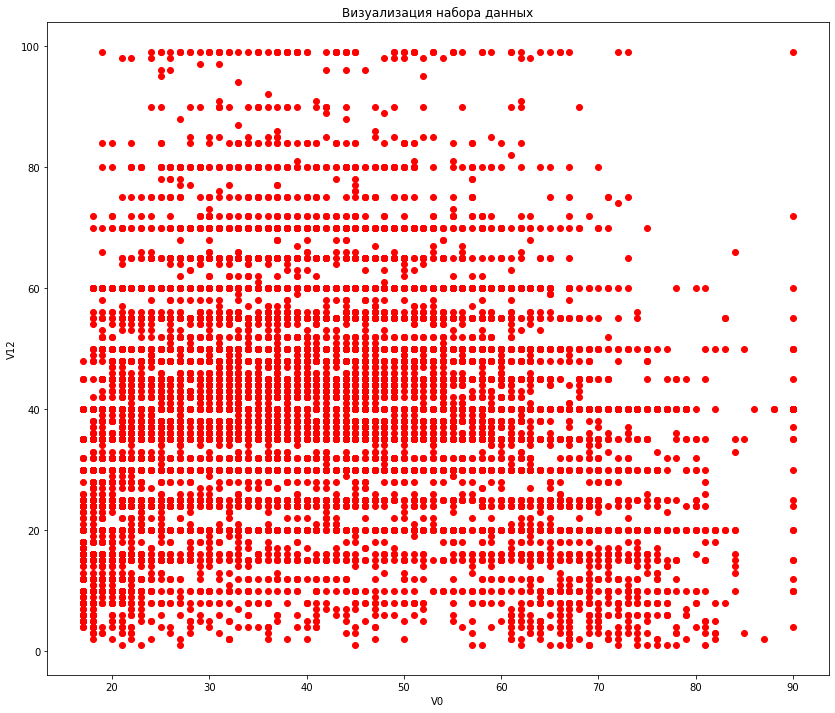

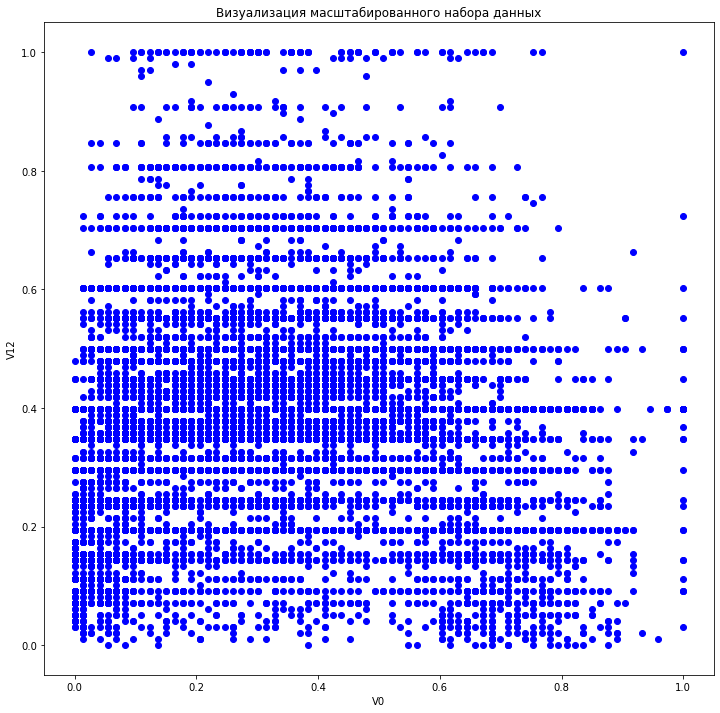

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
plt.title('Визуализация набора данных')
plt.scatter(df['V0'], df['V12'], color="red")
plt.xlabel('V0')
plt.ylabel('V12')
plt.show()

plt.figure(figsize=(12,12))
plt.title('Визуализация масштабированного набора данных')
plt.scatter(resX['V0'], resX['V12'], color="blue")
plt.xlabel('V0')
plt.ylabel('V12')
plt.show()

Можно было бы избавиться от точек на границах графика, но набор от этого сильно лучше не станет.

**4.          Разбейте набор данных на обучающую и тестовую выборки.**

In [5]:
X = resX['V0']
y = resX['V12']

In [6]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ration must be valid"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26049,), (6512,), (26049,), (6512,))

**5.          Постройте регресоры на базе следующих моделей регрессии:**

In [8]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

* Линейная регрессия (LinearRegression)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
s_lr = lr.score(X_test, y_test)
print('Точность классификации = ', s_lr)

Точность классификации =  0.006444401358000396


* Полиномиальная регрессия (PolynomialFeatures+LinearRegression)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly_lr = PolynomialRegression(2)
poly_lr.fit(X_train, y_train)
pred_poly_lr = poly_lr.predict(X_test)
s_poly_lr = poly_lr.score(X_test, y_test)
print('Точность классификации = ', s_poly_lr)    

Точность классификации =  0.1089363521176363


* Регрессия на основе метода стохастического градиентного спуска (SGDRegressor)

In [11]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)
pred_sgdr = sgdr.predict(X_test)
s_sgdr = sgdr.score(X_test, y_test)
print('Точность классификации = ', s_sgdr)

Точность классификации =  0.006372575640263056


* Гребневая регрессия (Ridge)

In [12]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

ridge_reg = RidgeRegression(20, 100)
ridge_reg.fit(X_train, y_train)
pred_ridge_r = ridge_reg.predict(X_test)
s_ridge_r = ridge_reg.score(X_test, y_test)
print('Точность классификации = ', s_ridge_r)

Точность классификации =  0.12371726215931599


* Регрессия лассо - Least Absolute Shrinkage and Selection Operator (Lasso)

In [13]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

lassor = LassoRegression(20, 0.01)
lassor.fit(X_train, y_train)
pred_lassor = lassor.predict(X_test)
s_lassor = lassor.score(X_test, y_test)
print('Точность классификации = ', s_lassor)

Точность классификации =  0.023548393947181778


* Эластичная сеть (ElasticNet)

In [14]:
from sklearn.linear_model import ElasticNet

def ElNetRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
      #  ("lasso_reg", Lasso(alpha=alpha)),
        ("elnet_reg", ElasticNet(alpha=alpha))
    ])

enr = ElNetRegression(20, 0.01)
enr.fit(X_train, y_train)
pred_enr = enr.predict(X_test)
s_enr = enr.score(X_test, y_test)
print('Точность классификации = ', s_enr)

Точность классификации =  0.07245033354567632


* Регрессия на основе метода ближайших соседей (KNeighborsRegressor)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor()
knnr.fit(X_train, y_train)
pred_knnr = knnr.predict(X_test)
s_knnr = knnr.score(X_test, y_test)
print('Точность классификации = ', s_knnr)

Точность классификации =  -0.03433031416389931


"В некоторых случаях коэффициент детерминации может принимать небольшие отрицательные значения, если модель получилась «бесполезной» и ее предсказания хуже, чем оценки на основе среднего значения."

* Регрессия на основе деревьев решений (DecisionTreeRegressor)

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_r = DecisionTreeRegressor(max_leaf_nodes=5)
tree_r.fit(X_train, y_train)
pred_tree_r = tree_r.predict(X_test)
s_tree_r = tree_r.score(X_test, y_test)
print('Точность классификации = ', s_tree_r)

Точность классификации =  0.12938093723051314


* Регрессия на основе метода опорных векторов (SVR)

In [17]:
from sklearn.svm import SVR

def SVMRegression(degree):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svm_reg", SVR(kernel='poly',degree=degree))
    ])

svr = SVMRegression(2)
%time svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
s_svr = svr.score(X_test, y_test)
print('Точность классификации = ', s_svr)

Wall time: 15.4 s
Точность классификации =  0.04545923952905084


**6.          При помощи GridSearch определите оптимальные параметры регрессоров (кроме LinearRegression).**

In [18]:
from sklearn.model_selection import GridSearchCV

* Полиномиальная регрессия (PolynomialFeatures+LinearRegression)

In [19]:
param_grid = [{ "poly__degree": [i for i in range(1, 11)] }]

grid_search = GridSearchCV(poly_lr, param_grid, n_jobs=-1, verbose=1)
%time grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Wall time: 5.34 s


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('std_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lin_reg',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                   

In [20]:
best_params = grid_search.best_params_
print('Параметры лучшего регрессора: ', best_params)
b_poly_lr = PolynomialRegression(best_params['poly__degree'])
b_poly_lr.fit(X_train, y_train)

# best score
bs_poly_lr = grid_search.best_score_
# best test score
bts_poly_lr = grid_search.best_estimator_.score(X_test, y_test)
print('Средний показатель качества лучшего регрессора = ', bs_poly_lr)
print('Лучший на тестовом наборе = ', bts_poly_lr)

Параметры лучшего регрессора:  {'poly__degree': 9}
Средний показатель качества лучшего регрессора =  0.15912546161601382
Лучший на тестовом наборе =  0.14078287155326819


* Регрессия на основе метода стохастического градиентного спуска (SGDRegressor)

In [21]:
param_grid = [{ "max_iter": [i for i in range(100, 5000)] }]

grid_search = GridSearchCV(sgdr, param_grid, n_jobs=-1, verbose=1)
%time grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 4900 candidates, totalling 24500 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 14000 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 19200 tasks      | elapsed:  1.3min


Wall time: 1min 40s


[Parallel(n_jobs=-1)]: Done 24500 out of 24500 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_iter': [100, 101, 102, 103, 104, 105, 106, 107,
                                       108, 109, 110, 111, 112, 113, 114, 115,
                                       116, 117, 118, 119, 120, 121, 122, 123,
 

In [22]:
best_params = grid_search.best_params_
print('Параметры лучшего регрессора: ', best_params)
b_sgdr = SGDRegressor(max_iter = best_params['max_iter'])
b_sgdr.fit(X_train, y_train)

bs_sgdr = grid_search.best_score_
bts_sgdr = grid_search.best_estimator_.score(X_test, y_test)
print('Средний показатель качества лучшего регрессора = ', bs_sgdr)
print('Лучший на тестовом наборе = ', bts_sgdr)

Параметры лучшего регрессора:  {'max_iter': 2796}
Средний показатель качества лучшего регрессора =  0.004065515594084745
Лучший на тестовом наборе =  0.006556096998722172


* Гребневая регрессия (Ridge)

In [23]:
param_grid = [{
        "poly__degree": [i for i in range(1, 20)],
        "ridge_reg__alpha": [i for i in np.arange(0.01,2,0.01)]
    }]


grid_search = GridSearchCV(ridge_reg, param_grid, n_jobs=-1, verbose=1)
%time grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 3781 candidates, totalling 18905 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 11522 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 12436 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 13536 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 14836 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 16336 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 18036 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 18890 out of 18905 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 18905 out of 18905 | elapsed:  2.3min finished


Wall time: 2min 18s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=20,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('std_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge_reg',
                                        Ridge(alpha=100, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                   

In [24]:
best_params = grid_search.best_params_
print('Параметры лучшего регрессора: ', best_params)
b_ridge_reg = RidgeRegression(best_params['poly__degree'], best_params['ridge_reg__alpha'])
b_ridge_reg.fit(X_train, y_train)

bs_ridge_r = grid_search.best_score_
bts_ridge_r = grid_search.best_estimator_.score(X_test, y_test)
print('Средний показатель качества лучшего регрессора = ', bs_ridge_r)
print('Лучший на тестовом наборе = ', bts_ridge_r)

Параметры лучшего регрессора:  {'poly__degree': 9, 'ridge_reg__alpha': 0.01}
Средний показатель качества лучшего регрессора =  0.1588986091783049
Лучший на тестовом наборе =  0.1410191410971563


* Регрессия лассо - Least Absolute Shrinkage and Selection Operator (Lasso)

In [25]:
param_grid = [{
        "poly__degree": [i for i in range(1, 20)],
        "lasso_reg__alpha": [i for i in np.arange(0.01,2,0.01)]
    }]

grid_search = GridSearchCV(lassor, param_grid, n_jobs=-1, verbose=1)
%time grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3781 candidates, totalling 18905 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1408 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 2808 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 4608 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 6808 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 9408 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 12408 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 15808 tasks      | elapsed:  2.4min


Wall time: 2min 49s


[Parallel(n_jobs=-1)]: Done 18905 out of 18905 | elapsed:  2.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=20,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('std_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso_reg',
                                        Lasso(alpha=0.01, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                  

In [26]:
best_params = grid_search.best_params_
print('Параметры лучшего регрессора: ', best_params)
b_lassor = LassoRegression(best_params['poly__degree'], best_params['lasso_reg__alpha'])
b_lassor.fit(X_train, y_train)

bs_lassor = grid_search.best_score_
bts_lassor = grid_search.best_estimator_.score(X_test, y_test)
print('Средний показатель качества лучшего регрессора = ', bs_lassor)
print('Лучший на тестовом наборе = ', bts_lassor)

Параметры лучшего регрессора:  {'lasso_reg__alpha': 0.01, 'poly__degree': 4}
Средний показатель качества лучшего регрессора =  0.03341637619747038
Лучший на тестовом наборе =  0.02884448563905262


* Эластичная сеть (ElasticNet)

In [27]:
param_grid = [{
        "poly__degree": [i for i in range(1, 20)],
        "elnet_reg__alpha": [i for i in np.arange(0.01,2,0.01)]
    }]

grid_search = GridSearchCV(enr, param_grid, n_jobs=-1, verbose=1)
%time grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3781 candidates, totalling 18905 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 2648 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 4448 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 6648 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 9248 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 12248 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 15648 tasks      | elapsed:  2.3min


Wall time: 2min 45s


[Parallel(n_jobs=-1)]: Done 18905 out of 18905 | elapsed:  2.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=20,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('std_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('elnet_reg',
                                        ElasticNet(alpha=0.01, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                      

In [28]:
best_params = grid_search.best_params_
print('Параметры лучшего регрессора: ', best_params)
b_enr = ElNetRegression(best_params['poly__degree'], best_params['elnet_reg__alpha'])
b_enr.fit(X_train, y_train)

bs_enr = grid_search.best_score_
bts_enr = grid_search.best_estimator_.score(X_test, y_test)
print('Средний показатель качества лучшего регрессора = ', bs_enr)
print('Лучший на тестовом наборе = ', bts_enr)

Параметры лучшего регрессора:  {'elnet_reg__alpha': 0.01, 'poly__degree': 3}
Средний показатель качества лучшего регрессора =  0.08168803857908997
Лучший на тестовом наборе =  0.07227134477599118


* Регрессия на основе метода ближайших соседей (KNeighborsRegressor)

In [29]:
param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 151)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 151)],
        "p": [i for i in range(1,6)]
    }
]

grid_search = GridSearchCV(knnr, param_grid, n_jobs=-1, verbose=1)
%time grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.6min


Wall time: 3min 10s


[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  3.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3, 4

In [30]:
best_params = grid_search.best_params_
print('Параметры лучшего регрессора: ', best_params)
b_knnr = KNeighborsRegressor(weights=best_params['weights'], n_neighbors=best_params['n_neighbors'])
b_knnr.fit(X_train, y_train)

bs_knnr = grid_search.best_score_
bts_knnr = grid_search.best_estimator_.score(X_test, y_test)
print('Средний показатель качества лучшего регрессора = ', bs_knnr)
print('Лучший на тестовом наборе = ', bts_knnr)

Параметры лучшего регрессора:  {'n_neighbors': 150, 'weights': 'uniform'}
Средний показатель качества лучшего регрессора =  0.1533573505178233
Лучший на тестовом наборе =  0.13521057836128614


* Регрессия на основе деревьев решений (DecisionTreeRegressor)

In [31]:
param_grid = [{ "max_leaf_nodes": [i for i in range(1, 21)] }]

grid_search = GridSearchCV(tree_r, param_grid, n_jobs=-1, verbose=1)
%time grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Wall time: 417 ms


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=5,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                             12, 13, 14, 15, 16, 17, 18, 19,


In [32]:
best_params = grid_search.best_params_
print('Параметры лучшего регрессора: ', best_params)
b_tree_r = DecisionTreeRegressor(max_leaf_nodes = best_params['max_leaf_nodes'])
b_tree_r.fit(X_train, y_train)

bs_tree_r = grid_search.best_score_
bts_tree_r = grid_search.best_estimator_.score(X_test, y_test)
print('Средний показатель качества лучшего регрессора = ', bs_tree_r)
print('Лучший на тестовом наборе = ', bts_tree_r)

Параметры лучшего регрессора:  {'max_leaf_nodes': 16}
Средний показатель качества лучшего регрессора =  0.15632497973598358
Лучший на тестовом наборе =  0.13932625718817893


* Регрессия на основе метода опорных векторов (SVR)

In [33]:
param_grid = [{ "svm_reg__degree": [i for i in range(1, 4)] }]

grid_search = GridSearchCV(svr, param_grid, n_jobs=-1, verbose=1)
%time grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.2min finished


Wall time: 3min 26s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm_reg',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=2, epsilon=0.1,
                                            gamma='scale', kernel='poly',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'svm_reg__degree': [1, 2, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             

In [34]:
best_params = grid_search.best_params_
print('Параметры лучшего регрессора: ', best_params)
b_svr = SVMRegression(best_params['svm_reg__degree'])
b_svr.fit(X_train, y_train)

bs_svr = grid_search.best_score_
bts_svr = grid_search.best_estimator_.score(X_test, y_test)
print('Средний показатель качества лучшего регрессора = ', bs_svr)
print('Лучший на тестовом наборе = ', bts_svr)

Параметры лучшего регрессора:  {'svm_reg__degree': 2}
Средний показатель качества лучшего регрессора =  0.07144046199239498
Лучший на тестовом наборе =  0.04545923952905084


**7.          Визуализируйте на плоскости точки тестовой выборки и графики различных моделей регрессий разными цветами. Подпишите оси и создайте легенду для графика.**

Функция для отрисовки линии регрессии модели

In [35]:
def plot_model(model, color, label):
    X_plot = np.linspace(0, 1, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot[:,0], y_plot, color=color, label=label)

Визуализация (модели с оптимальными параметрами)

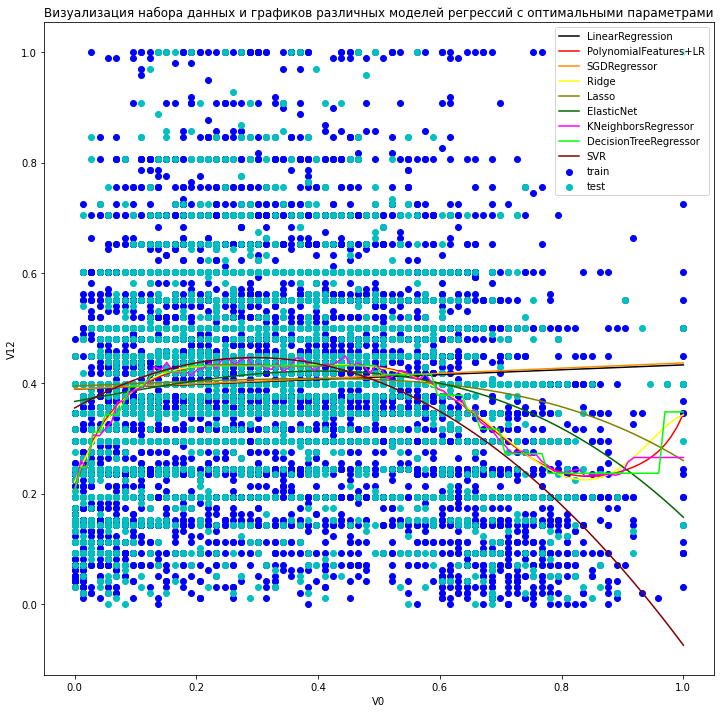

In [36]:
plt.figure(figsize=(12,12))
plt.title('Визуализация набора данных и графиков различных моделей регрессий с оптимальными параметрами')
plt.scatter(X_train, y_train, color="b", label='train')
plt.scatter(X_test, y_test, color="c", label='test')

plot_model(lr, 'black', 'LinearRegression')
plot_model(b_poly_lr, 'r', 'PolynomialFeatures+LR')
plot_model(b_sgdr, 'darkorange', 'SGDRegressor')
plot_model(b_ridge_reg, 'yellow', 'Ridge')
plot_model(b_lassor, 'olive', 'Lasso')
plot_model(b_enr, 'darkgreen', 'ElasticNet')
plot_model(b_knnr, 'magenta', 'KNeighborsRegressor')
plot_model(b_tree_r, 'lime', 'DecisionTreeRegressor')
plot_model(b_svr, 'maroon', 'SVR')

plt.legend()
plt.xlabel('V0')
plt.ylabel('V12')
plt.show()

**8.          Определите лучший регрессор по показателю коэффициент детерминации.**

Определяю показатели коэффициента детерминации моделей (с оптимальными параметрами) на тестовом наборе

In [37]:
print('  Linear Regression = ', s_lr)
print('  Polynomial Features + Linear Regression =', bs_poly_lr, bts_poly_lr)
print('  Stochastic Gradient Descent Regressor = ', bs_sgdr, bts_sgdr)
print('  Ridge Regression = ', bs_ridge_r, bts_ridge_r)
print('  Least Absolute Shrinkage and Selection Operator = ', bs_lassor, bts_lassor)
print('  Elastic Net Regressor =', bs_enr, bts_enr)
print('  K Nearest Neighbors Regressor = ', bs_knnr, bts_knnr)
print('  DecisionTreeRegressor = ', bs_tree_r, bts_tree_r)
print('  Support Vector Regression = ', bs_svr, bts_svr)

  Linear Regression =  0.006444401358000396
  Polynomial Features + Linear Regression = 0.15912546161601382 0.14078287155326819
  Stochastic Gradient Descent Regressor =  0.004065515594084745 0.006556096998722172
  Ridge Regression =  0.1588986091783049 0.1410191410971563
  Least Absolute Shrinkage and Selection Operator =  0.03341637619747038 0.02884448563905262
  Elastic Net Regressor = 0.08168803857908997 0.07227134477599118
  K Nearest Neighbors Regressor =  0.1533573505178233 0.13521057836128614
  DecisionTreeRegressor =  0.15632497973598358 0.13932625718817893
  Support Vector Regression =  0.07144046199239498 0.04545923952905084


**Полиномиальная (PolynomialFeatures+LinearRegression) и гребневая (Ridge) регрессии оказалась лучше остальных по коэффициенту детерминации. На тестовом наборе слегка лучше оказалась гребневая регрессия. Средний коэффициент детерминации регрессора оказался немного выше у полиномиальной регрессии.** 

**Но всё это очень низкие показатели. Предсказание никакое. И причина этого в наборе данных.**